# Part I - Ford bike sharing data exploration
## by Goodness Folayan




## Preliminary Wrangling

### Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. With over 180,000 entries of bike data

In [662]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Let's load the data and perform some wrangling

In [663]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

Some rows for the member_birth_year and member_gender are empty. Let's view the description. 

In [664]:
bikes.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [665]:
bikes.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

I will view the above infomation with a histogram

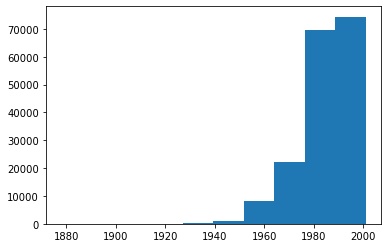

In [666]:
#View the distribution on a histogram
plt.hist(bikes.member_birth_year);

In [667]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

They are over 8265 rows contributing to 4.5% of missing data. 

We can drop the corresponding rows with the missing entries, since it contributes an insignificant portion to our data.

In [668]:
bikes.dropna(inplace=True)

In [669]:
# Convert start time and end time to datetime types and birth year to integer
bikes['start_time'] = pd.to_datetime(bikes.start_time, format='%Y%m%d %H:%M:%S')
bikes['end_time'] = pd.to_datetime(bikes.end_time, format='%Y%m%d %H:%M:%S')
bikes['member_birth_year'] = bikes.member_birth_year.astype(int)

In [670]:
# Drop unnecessary columns like start and end station's id,longitude and latitude  data
bikes.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_station_id','end_station_id'], axis = 1, inplace = True)

In [671]:
bikes.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [672]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(5)
memory usage: 14.0+ MB


In [673]:
cat_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']
num_vars = ['duration_sec','member_birth_year']

Consider the sub variables and value counts of the categorical variables

In [674]:
for var in cat_vars:
    print(bikes[var].value_counts())

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64
Subscriber    158386
Customer       16566
Name: user_type, dtype: int64
No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64


### What is the structure of your dataset?

> There are 174,952 bike ride entries with 10 features: duration_sec,start_time, end_time, start_station_name, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best in predicting the duration_sec

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I expect that member birth year will have the strongest effect on the bike's duration(Members of a particular age demographic e.g young people in their 20's to 30's will have longer bike usage than others). Also, I expect that member_gender, user_type, time, days of the week(weekday or weekend), bike_share_for_all_trip will have effects on the bike rides' duration.


## Univariate Exploration
I begin by considering the distribution of the main feature of interest: duration


In [675]:
bikes.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

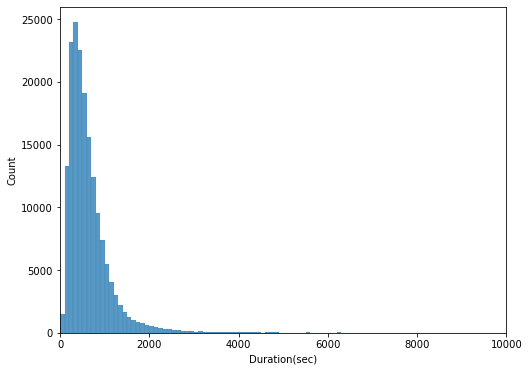

In [676]:
# A rough histogram plot
binsize = 100
bins = np.arange(0,bikes.duration_sec.max()+ binsize, binsize)
plt.figure(figsize=[8,6])
sb.histplot(data = bikes, x = 'duration_sec', bins = bins)
plt.xlabel('Duration(sec)')
plt.xlim((0,10000));

In [677]:
bikes.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [678]:
np.log10(bikes.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

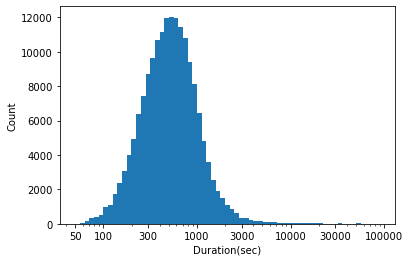

In [679]:
# The distribution appears to be logaritmic,
# we shall thus perform the logarathmic transformation
#create a log_transform function
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
    
# Apply the transformation
log_binsize = 0.05
bins = 10** np.arange(1.7,np.log10(bikes.duration_sec.max())+log_binsize, log_binsize)
plt.hist(bikes.duration_sec, bins=bins)
plt.xscale('log')
ticks = [50,100,300,1000,3000,10000,30000,100000]
label = ['{}'.format(v) for v in ticks]
plt.xlabel('Duration(sec)')
plt.ylabel('Count')
plt.xticks(ticks, labels=label);

Duration has a long-tailed distribution with a lot of bike rides on the low end of the duration and a few on the high end. When plotted on a log-scale the distribution is unimodal, occurring betwwen 300 and 1000 secs.

Next is the first predictor variable of interest: member_birth_year


In [680]:
bikes.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

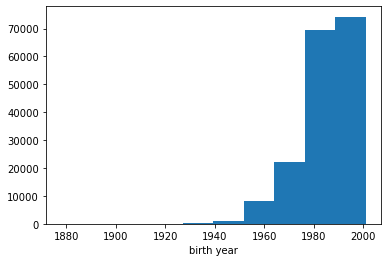

In [681]:
plt.hist(bikes.member_birth_year)
plt.xlabel('birth year');

We observe that the birth year lies with at an almost 80 years range (1920 - 2000) 

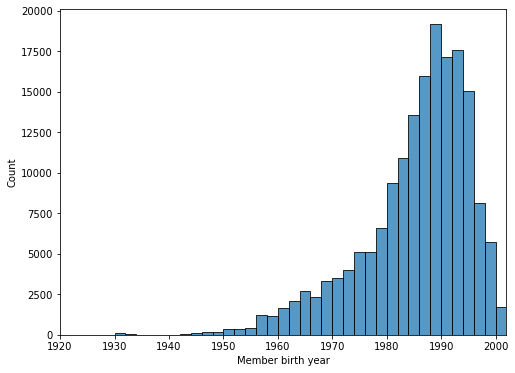

In [682]:
# Plotting member birth year on a standard scale
binsize = 2
bins = np.arange(1900, bikes.member_birth_year.max()+binsize,binsize)

plt.figure(figsize = [8,6])
sb.histplot(data = bikes, x = 'member_birth_year', bins = bins)
plt.xlim((1920,2002))
plt.xlabel('Member birth year')
plt.show()

In [683]:
bikes.start_time.describe(datetime_is_numeric=True)

count                           174952
mean     2019-02-15 21:27:05.282492160
min         2019-02-01 00:00:20.636000
25%      2019-02-08 08:32:16.954249984
50%      2019-02-15 22:20:21.685499904
75%      2019-02-22 11:22:05.289500160
max         2019-02-28 23:59:18.548000
Name: start_time, dtype: object

The time of capturing of the data was at February 2019, We can derive an "Age" column specifying the ages of the members as at the capturing of this data


In [684]:
# Define the age column
bikes['age'] = 2019 - bikes['member_birth_year']

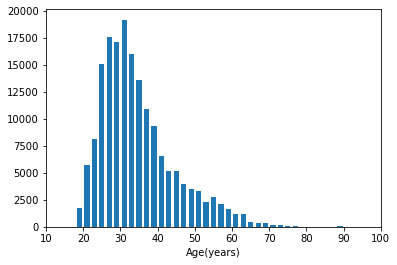

In [685]:
#Plot the age column data on a histogram
binsize = 2
bins = np.arange(0, bikes.age.max()+binsize,binsize)

#plt.figure(figsize = [20,10])
# Histogram on the left, normal distribution
plt.hist(data = bikes, x = 'age', bins = bins, rwidth = 0.7)
tick = [10,20,30,40,50,60,70,80,90,100]
label = ['{}'.format(v) for v in tick]
plt.xticks(ticks = tick, labels = label)
plt.xlim((10,100))
plt.xlabel('Age(years)')
plt.show()



We can see that the mode of the ages occurred between late 20's to early 30's years of age for bike users, peaking at 30 - 32 years of age. 

I'll move over to the other categorical variables of interest in the dataset:member_gender, user_type, and bike_share_for_all_trip

A good idea is to take out the rows of data with incorrectly filled member_birth_years (ages above 80years) since this will constitute outliers and constitue possible distruption of our data

In [686]:
bikes_age_outliers = bikes.loc[bikes.age>80]
bikes_age_outliers

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,Shattuck Ave at Telegraph Ave,Shattuck Ave at 55th St,5391,Subscriber,1900,Male,Yes,119
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,Central Ave at Fell St,Broderick St at Oak St,5801,Subscriber,1931,Male,No,88
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,Duboce Park,Broderick St at Oak St,6608,Subscriber,1931,Male,No,88
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,Duboce Park,Page St at Scott St,5018,Subscriber,1931,Male,No,88
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,Bryant St at 2nd St,Grove St at Masonic Ave,6249,Subscriber,1900,Male,No,119
...,...,...,...,...,...,...,...,...,...,...,...
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,Howard St at 2nd St,San Francisco Caltrain (Townsend St at 4th St),2175,Subscriber,1902,Female,No,117
177955,377,2019-02-01 18:23:33.411,2019-02-01 18:29:50.795,1st St at Folsom St,5th St at Folsom,5444,Subscriber,1933,Female,Yes,86
179280,355,2019-02-01 14:32:42.247,2019-02-01 14:38:37.896,Valencia St at 24th St,22nd St at Dolores St,1815,Subscriber,1938,Male,No,81
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,Yerba Buena Center for the Arts (Howard St at ...,San Francisco Caltrain Station 2 (Townsend St...,5031,Subscriber,1901,Male,No,118


In [687]:
#Taking out the above data
bikes = pd.concat([bikes, bikes_age_outliers]).drop_duplicates(keep=False)

In [688]:
#confirm that the age outliers have been removed
bikes.loc[bikes.age >80]

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age


we can derive the time and days of the week at which the bikes were rented. Let's view the distribution of the start time data series

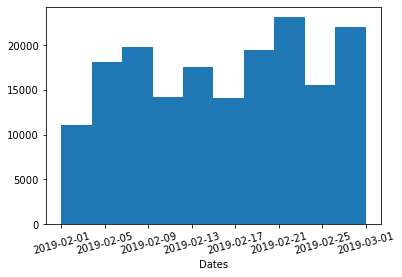

In [689]:
plt.hist(bikes.start_time)
plt.xticks(rotation = 15)
plt.xlabel('Dates');

Proceeding to derive the "date", "time" and "day of the week" columns from the start_time column:


In [690]:
#Split the start_time and end_time columns to the date columns 
bikes['start_date'] = pd.to_datetime(bikes['start_time']).dt.date
bikes['end_date'] = pd.to_datetime(bikes['end_time']).dt.date

#Converting the time column to datetime
bikes['start_time'] = pd.to_datetime(bikes['start_time']).dt.time
#convert the start_date and end_date new columns to the datetime format
bikes.start_date = pd.to_datetime(bikes.start_date)
bikes.end_date = pd.to_datetime(bikes.end_date)
#Remove microseconds
bikes.start_time = bikes.start_time.apply(lambda x : x.replace(microsecond = 0))
#Convert start_time column to datetime
bikes.start_time = pd.to_datetime(bikes.start_time, format = '%H:%M:%S')                                          

In [691]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [692]:
bikes.start_time = pd.to_datetime(bikes.start_time).dt.time

In [693]:
#Insert dayname column
bikes['day_name'] = bikes.start_date.dt.day_name()


In [694]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [695]:
bikes.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name
0,52185,17:32:10,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,2019-02-28,2019-03-01,Thursday
2,61854,12:13:13,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,2019-02-28,2019-03-01,Thursday
3,36490,17:54:26,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,2019-02-28,2019-03-01,Thursday
4,1585,23:54:18,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019-03-01,Thursday
5,1793,23:49:58,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,2019-02-28,2019-03-01,Thursday
6,1147,23:55:35,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983,Female,No,36,2019-02-28,2019-03-01,Thursday
7,1615,23:41:06,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989,Male,No,30,2019-02-28,2019-03-01,Thursday
8,1570,23:41:48,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988,Other,No,31,2019-02-28,2019-03-01,Thursday
9,1049,23:49:47,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,6488,Subscriber,1992,Male,No,27,2019-02-28,2019-03-01,Thursday
10,458,23:57:57,2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996,Female,Yes,23,2019-02-28,2019-03-01,Thursday


In [696]:
bikes.reset_index(inplace=True)

In [697]:
bikes.drop(columns='index', inplace=True)
bikes.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name
0,52185,17:32:10,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,2019-02-28,2019-03-01,Thursday
1,61854,12:13:13,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,2019-02-28,2019-03-01,Thursday
2,36490,17:54:26,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,2019-02-28,2019-03-01,Thursday
3,1585,23:54:18,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019-03-01,Thursday
4,1793,23:49:58,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,2019-02-28,2019-03-01,Thursday


Let us view the distribution of the days of the week

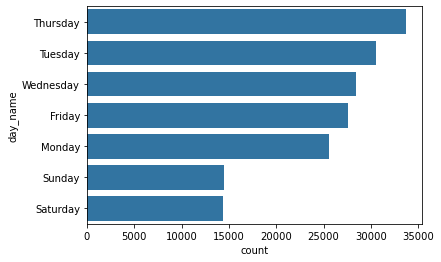

In [698]:
day_order = bikes['day_name'].value_counts().index
#plotting the days distribution by order
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, y = 'day_name', order = day_order, color = base_color);

In [699]:
bikes_counts = bikes['day_name'].value_counts()

In [700]:
## To get relative frequency
no_of_bikes = bikes.shape[0]
max_day = bikes_counts[0]
max_proportion = max_day/no_of_bikes
max_proportion

0.1927843900205997

In [701]:
x_ticks_spacing = np.arange(0, max_proportion, 0.02)
tick_names = ['{:.2f}'.format(v) for v in x_ticks_spacing]

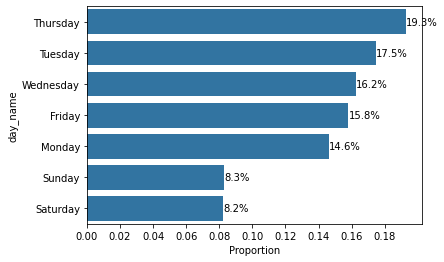

In [702]:
sb.countplot(data = bikes, y = 'day_name', order = day_order, color = base_color)
plt.xticks(x_ticks_spacing * no_of_bikes, tick_names)
plt.xlabel('Proportion')

for i in range(len(bikes_counts)):
    count = bikes_counts[i]
    pct_string = '{:.1f}%'.format(100*count/no_of_bikes)
    plt.text(count+1,i, pct_string, va = 'center');

Let us examine the start times of the bikes usage

In [703]:
bikes.head(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name
0,52185,17:32:10,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,2019-02-28,2019-03-01,Thursday
1,61854,12:13:13,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,2019-02-28,2019-03-01,Thursday
2,36490,17:54:26,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,2019-02-28,2019-03-01,Thursday
3,1585,23:54:18,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019-03-01,Thursday
4,1793,23:49:58,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,2019-02-28,2019-03-01,Thursday


In [704]:
bikes.loc[bikes.duration_sec.isna()]

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name


In [705]:
#Let's derive the hours, minutes and seconds columns from the start_time column
#Convert the start_time column to a list of lists
bikes['start_time'] = bikes['start_time'].astype(str)
bikes['start_time'] = bikes['start_time'].str.split(":")
# new dataframe from the column of lists
split_df = pd.DataFrame(bikes['start_time'].tolist(), columns=['hours', 'minutes', 'seconds'])
# concatenate df and split_df
bikes = pd.concat([bikes, split_df], axis =1)


In [706]:
# drop rows of missing data
bikes.dropna(inplace=True)

In [707]:
bikes.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name,hours,minutes,seconds
0,52185,"[17, 32, 10]",2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,2019-02-28,2019-03-01,Thursday,17,32,10
1,61854,"[12, 13, 13]",2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,2019-02-28,2019-03-01,Thursday,12,13,13
2,36490,"[17, 54, 26]",2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,2019-02-28,2019-03-01,Thursday,17,54,26
3,1585,"[23, 54, 18]",2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019-03-01,Thursday,23,54,18
4,1793,"[23, 49, 58]",2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,2019-02-28,2019-03-01,Thursday,23,49,58
5,1147,"[23, 55, 35]",2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983,Female,No,36,2019-02-28,2019-03-01,Thursday,23,55,35
6,1615,"[23, 41, 06]",2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989,Male,No,30,2019-02-28,2019-03-01,Thursday,23,41,06
7,1570,"[23, 41, 48]",2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988,Other,No,31,2019-02-28,2019-03-01,Thursday,23,41,48
8,1049,"[23, 49, 47]",2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,6488,Subscriber,1992,Male,No,27,2019-02-28,2019-03-01,Thursday,23,49,47
9,458,"[23, 57, 57]",2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996,Female,Yes,23,2019-02-28,2019-03-01,Thursday,23,57,57


In [708]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174760 entries, 0 to 174759
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [709]:
bikes.duration_sec.isna().sum()

0

In [710]:
bikes.hours.value_counts()

17    20893
08    20218
18    16103
09    15194
16    13452
07    10226
19     9418
15     8618
12     8207
13     8072
10     7962
14     7654
11     7451
20     6210
21     4399
06     3289
22     2793
23     1572
00      892
05      866
01      525
02      355
04      227
03      164
Name: hours, dtype: int64

In [711]:
bikes_hours_index = bikes.hours.value_counts().index

In [712]:
bikes.hours.unique()

array(['17', '12', '23', '22', '21', '18', '20', '19', '10', '15', '16',
       '09', '11', '00', '13', '14', '08', '07', '05', '06', '04', '03',
       '02', '01'], dtype=object)

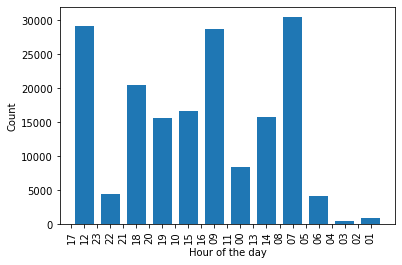

In [713]:
bins = np.arange(0,24+2,2)
plt.hist(data = bikes, x = 'hours', color=base_color,rwidth=0.7, bins = bins)

plt.xticks(rotation = 90)
plt.xlabel('Hour of the day')
plt.ylabel('Count');

We observe that the peak usage occurs between 8am to 10am followed quickly between (4pm to 6pm). 

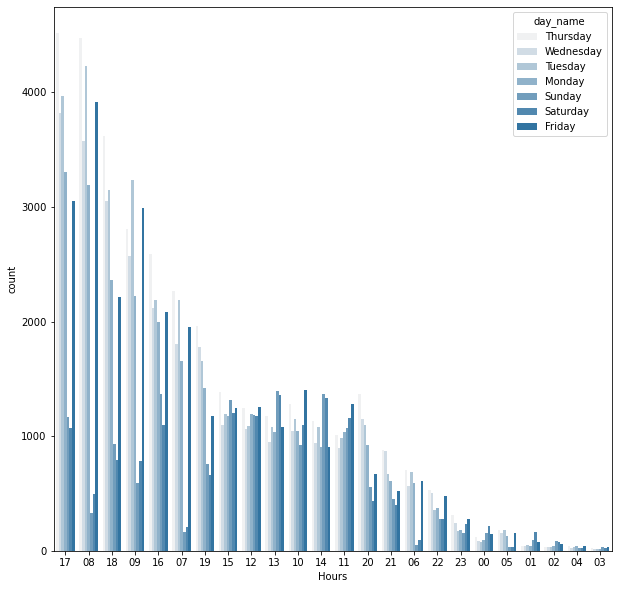

In [714]:
plt.figure(figsize=[10,10])
sb.countplot(data=bikes, x = 'hours', order = bikes_hours_index, color = base_color, hue='day_name' )
plt.xlabel('Hours');


It is interesting that the bikes are used mostly during work days (between mondays to Fridays) and least on weekends. Also worth mentioning is the fact that the peak times are during the start work times and end work times (8am and 5pm). It is thus suggestable that the use of the bikes are for work related purposes as opposed to leisure or recreational purposes.

In [715]:
#Convert hours, minutes and sec column data-types to integers
time_data = ['hours', 'minutes', 'seconds']
for time in time_data:
    bikes[time] = bikes[time].astype(int)
#To confirm successful type conversion:
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174760 entries, 0 to 174759
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

Let's consider the distribution of the categorical variables

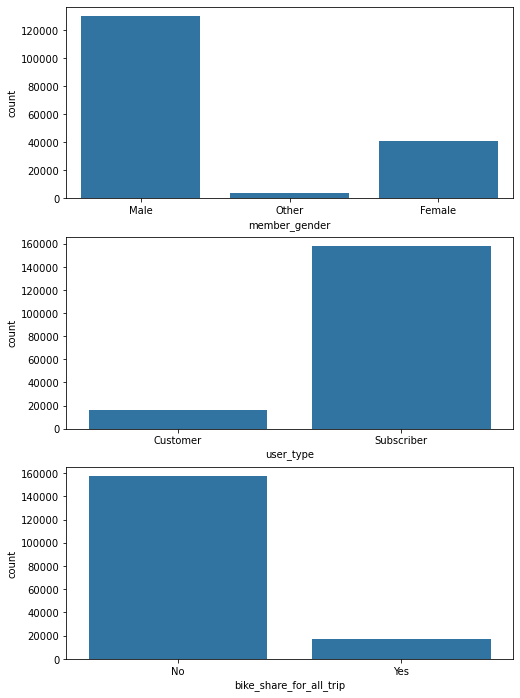

In [716]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,12])

default_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = bikes, x = 'user_type', color = default_color, ax = ax[1])
sb.countplot(data = bikes, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

The member genders of the dataset are mostly males, with females taking second place. 
For the user type, Subscribers are the most dominant. Bike_share_for_all_trip shows that Most bikers did not share their bikes for the duration of the trip.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable had a large range of variables, so I used a log transform. Using the log transform made the data look unimodal with the peak occuring between 300 and 1000 secs.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> When investigating the member_birth_year column, a number of outlier points were identified. These points can be attributed to recording errors, a step taken further was the creation of a new column (Age) to better visualize the data. In identifying the days and times of usage, it was necessary to incoporate these features into the dataset deriving them from the start date column. Creating new columns for day names and start times, a pattern of usage emerged. Quite interesting was the fact that the least bikes usage was on weekends (Saturdays and Sundays). Also interesting that the peak times of starting fell on the opening and close of work (8AM and 5pm).

## Bivariate Exploration

> In this section, we shall investigate relationships between pairs of variables in our
data. Before we proceed with this section we need to update our numerical and categorical variables

In [717]:
num_vars 

['duration_sec', 'member_birth_year']

In [718]:
#Remove member_birth_year and replace with age
num_vars.remove('member_birth_year')
num_vars.append('age')

In [719]:
cat_vars


['member_gender', 'user_type', 'bike_share_for_all_trip']

In [720]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174760 entries, 0 to 174759
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [721]:
num_vars_1 = ['hours']

In [722]:
cat_vars_1 = ['day_name']

In [723]:
num_vars = num_vars + num_vars_1
cat_vars = cat_vars + cat_vars_1

In [724]:
num_vars

['duration_sec', 'age', 'hours']

In [725]:
cat_vars

['member_gender', 'user_type', 'bike_share_for_all_trip', 'day_name']

Let's create a copy of the dataset and drop columns with redundant variables: minutes, seconds,start_time,end_time


In [726]:
bikes_v1 = bikes.copy()
bikes_v1.drop(columns=['minutes','seconds','start_time','end_time','end_date','start_date'],axis =1, inplace = True)

Plotting a heatmap to compare the relationships for the following groups:
 - member_gender vs user_type
 - member_gender vs bike_share_for_all_trip
 - bike_share_for_all_trip vs user_type

Considering the first grouping: member gender vs user type, let's define a function for all groupings that plots the heatmap and cluster columns for the groups


In [727]:
def ultimate_plotter(data, value1,value2):
    "This will take in two features and return the heatmap and the cluster columns of the features"
    
    feature_counts = data.groupby([value1,value2]).size()
    feature_counts = feature_counts.reset_index(name = 'count')
    feature_counts = feature_counts.pivot(index = value1, columns = value2, values = 'count')
    # Make the subplots
    plt.figure(figsize=[20,8])
    #subplot1: heatmap
    plt.subplot(1,2,1)
    sb.heatmap(feature_counts, annot = True, fmt = '.2g');
    
    #subplot2: cluster columns
    plt.subplot(1,2,2)
    sb.countplot(data = data, x = value1, hue = value2)

- Member gender vs user type

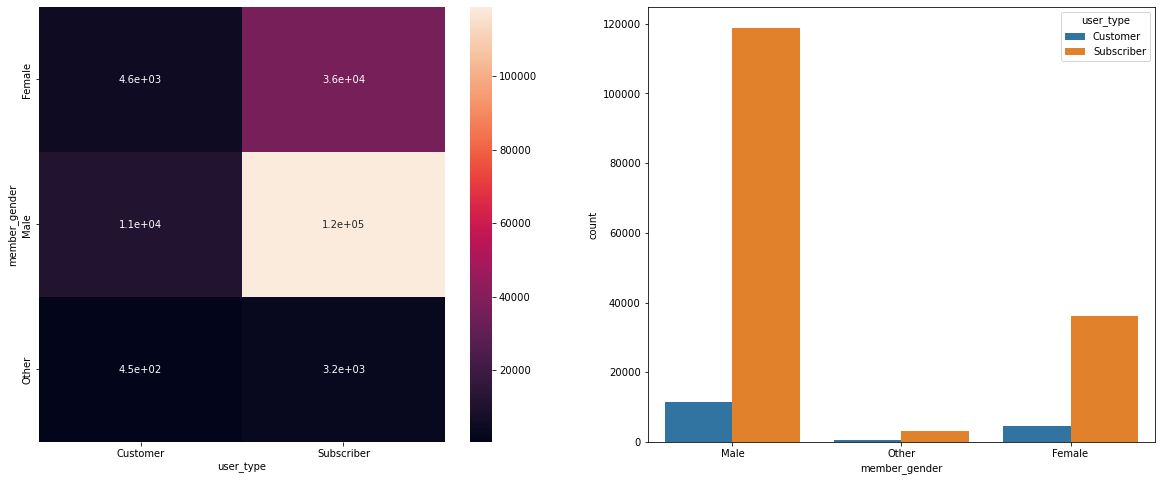

In [728]:
ultimate_plotter(bikes_v1,'member_gender', 'user_type')


We can see from the above diagrams that males with formed the greatest percentage of the users( both subscribers and customers), with only subscribers accounting for almost 3x the number of female users and 10x the number of male customers. The number of female subscribers are 9x the number of female subscribers. While "Other" gender subscribers are over 7x the number of customers in thesame gender category. 

- Member gender vs bike share status

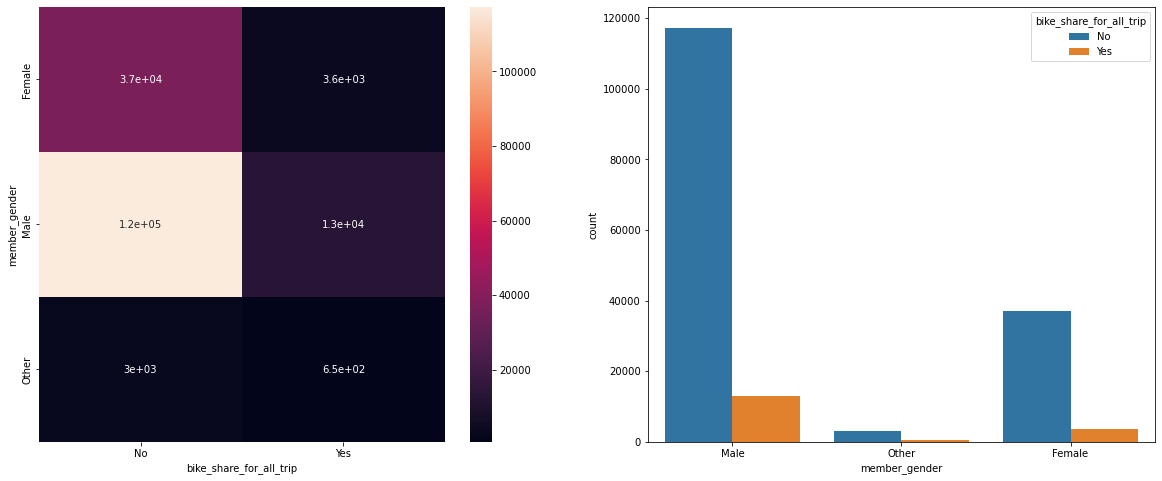

In [729]:
ultimate_plotter(bikes_v1,'member_gender','bike_share_for_all_trip')

Categorizing bikeshare data shows similar patterns across all gender types. With a greater percentage of the gender types not sharing their bikes during the trips- the greatest proportion coming from the male group, followed by females, while the least from the other gender types.

- Bike share vs user type 

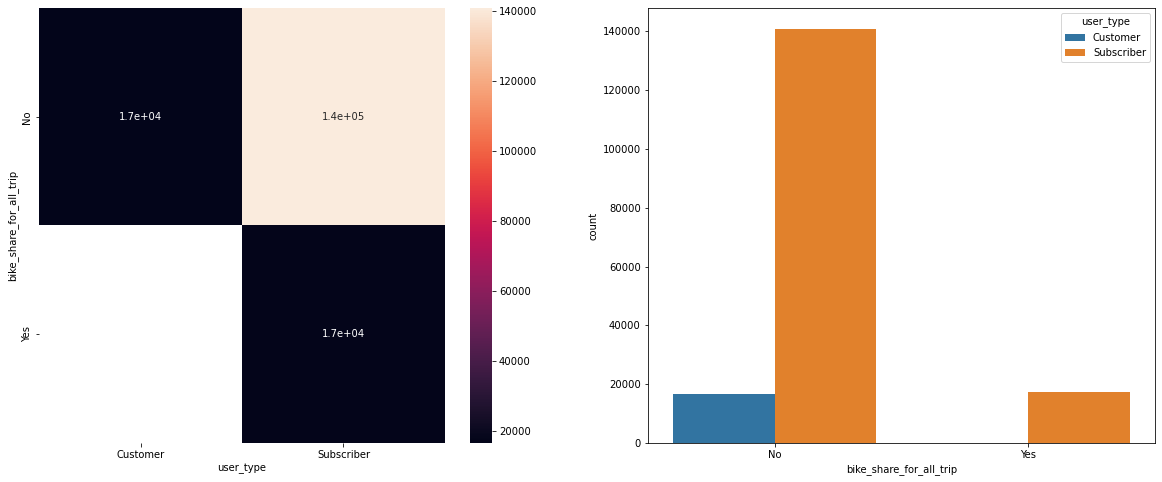

In [730]:
ultimate_plotter(bikes_v1,'bike_share_for_all_trip','user_type')

We see that more subscribers did not share their bikes than those that did. On the other hand, all customers did not share their bikes for the duration of the trip. It is possible that a no-sharing-bikes clause during trips might be responsible for that or the make of the bicycle for one-time customers makes bike sharing impossible.

Let us then compare the distribution of these variables with our key feature- duration, to see how they compare.


In [731]:
bikes_v1['log_duration'] = bikes_v1['duration_sec'].apply(log_trans)

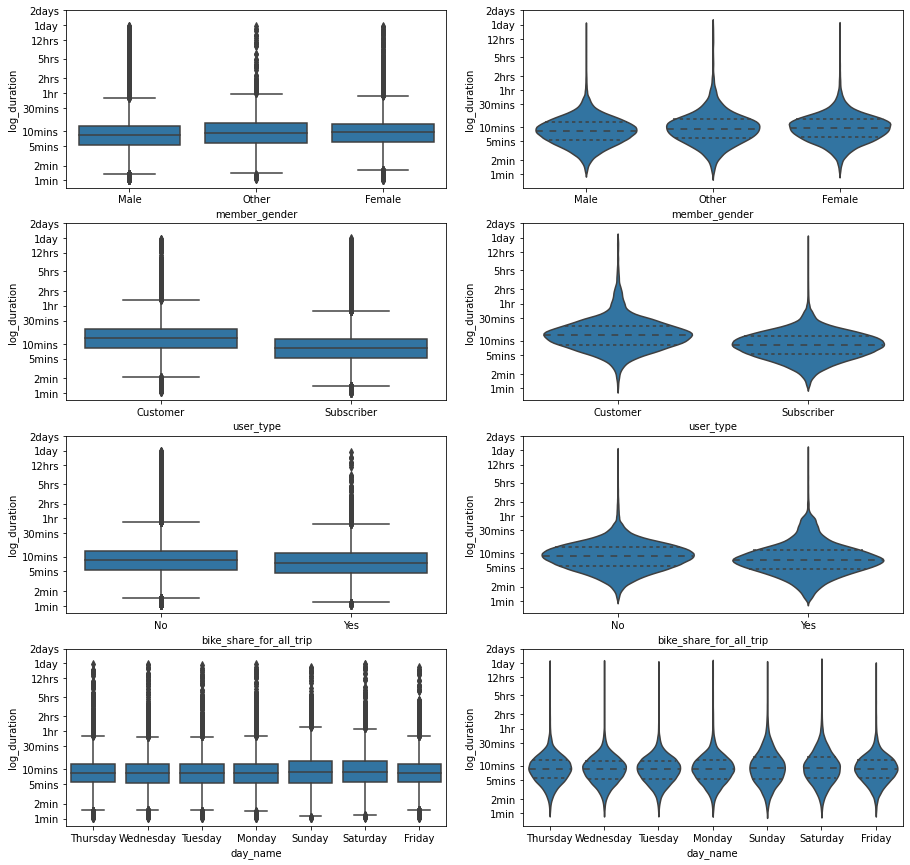

In [735]:
# plot the categorical variables against duration
#bike_samp = bikes.sample(n= 10000, replace = False)
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,15])

for i in range(len(cat_vars)):
    var = cat_vars[i]
    tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000,43200,86400,172800])
    label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs','12hrs','1day','2days']
    sb.boxplot(data = bikes_v1, x = var, y = 'log_duration', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(tick))
    ax[i,0].set_yticklabels(label)
    sb.violinplot(data = bikes_v1, x = var, y = 'log_duration', ax = ax[i,1],
               color = default_color, inner = 'quartile')
    ax[i,1].set_yticks(log_trans(tick))
    ax[i,1].set_yticklabels(label)

plt.show()

The plot of data using violinplots beside the boxplot on all the data shows very interesting information. The concentration of the duration of the bike rides typically falls between 5mins to 20mins across all the categorical data types - member gender and user type. The customer performed slightly better than the subscriber for the user type, while Females and other under the member gender types outperformed the male variable. For users that shared their Bikes during the trip, they appeared to have longer duration than those that didn't. 

Weekends does appear to have an elongated violinplot for weekends( Saturday and Sunda) indicating that longer durations was the norm for the weekends than for the other workdays.

Let's examine the numeric variables.
Create a plot matrice:


In [736]:
num_vars

['duration_sec', 'age', 'hours']

To avoid overfitting, let's take a sample of the data set and make a plot matrice of the numerical variables

In [737]:
bikes_subset = bikes_v1.sample(n = 2000)
bikes_subset

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day_name,hours,log_duration
36460,152,Golden Gate Ave at Polk St,San Francisco Public Library (Grove St at Hyde...,5413,Subscriber,1996,Female,No,23,Saturday,12,2.181844
156623,94,Bancroft Way at Telegraph Ave,Bancroft Way at College Ave,4512,Subscriber,1997,Female,No,22,Tuesday,8,1.973128
146777,4641,Embarcadero BART Station (Beale St at Market St),Folsom St at 3rd St,5421,Subscriber,1977,Male,Yes,42,Wednesday,9,3.666612
170667,636,Post St at Kearny St,Berry St at King St,4413,Subscriber,1991,Female,No,28,Friday,15,2.803457
103952,262,Franklin Square,16th St Mission BART,1771,Subscriber,1985,Male,No,34,Tuesday,20,2.418301
...,...,...,...,...,...,...,...,...,...,...,...,...
2314,720,Folsom St at 9th St,Church St at Duboce Ave,6133,Subscriber,1984,Male,No,35,Thursday,18,2.857332
92414,561,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,6522,Subscriber,1962,Male,No,57,Friday,9,2.748963
74794,1600,Powell St BART Station (Market St at 5th St),Powell St BART Station (Market St at 5th St),6097,Subscriber,1993,Female,Yes,26,Monday,19,3.204120
113451,609,Milvia St at Derby St,Bancroft Way at Telegraph Ave,5103,Subscriber,1998,Male,Yes,21,Monday,18,2.784617


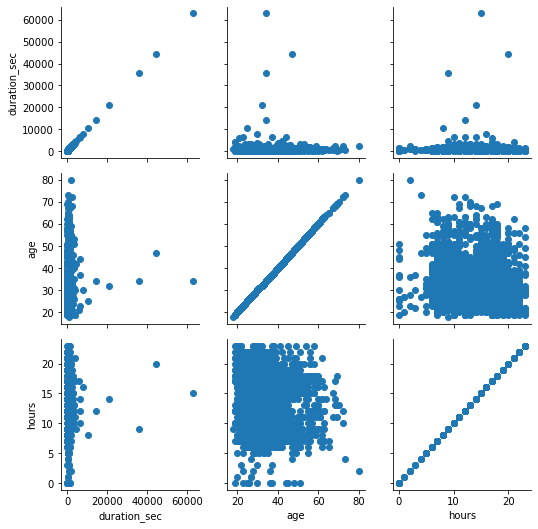

In [738]:
g = sb.PairGrid(data = bikes_subset, vars = num_vars)
g.map(plt.scatter);

The duration does appear to have a no relationship with either age or hours(time of the day). Examining this on a log scale should present more information.- Other than that, the other variables appear to have no correlation on each other.

In [739]:
bikes_subset.shape

(2000, 12)

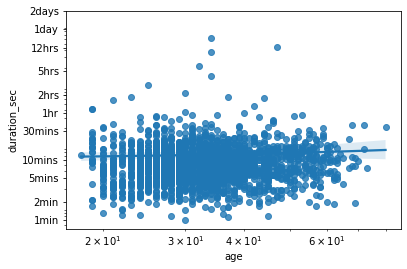

In [740]:
binsize = 2
bins = np.arange(0, bikes_subset.age.max()+binsize,binsize)
sb.regplot(x = bikes_subset.age, y = bikes_subset.duration_sec)
plt.yscale('log')
plt.xscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000,43200,86400,172800])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs','12hrs','1day','2days']
plt.yticks(ticks = tick, labels = label);

With the above plot, age seems to have no bearing on the duration. It might be helpful to see the distribution of the duration with age.


In [741]:
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

''

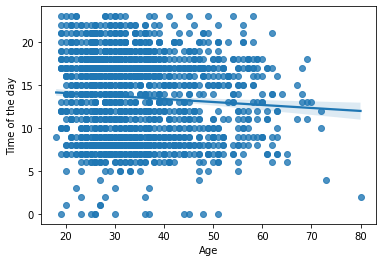

In [742]:
bins = np.arange(1,80,2)
sb.regplot(data = bikes_subset, x = 'age', y = 'hours', color=base_color)
plt.xlabel('Age')
plt.ylabel('Time of the day')
#tick = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #Between 6am and 8pm
#label = ['{}:00'.format(v) for v in tick]
#plt.xticks(ticks=tick, labels= label, rotation = 15)
;

As observed, there appears to be no correlation between the age and the time of the day that the bikes are used. 

In [743]:
cat_vars

['member_gender', 'user_type', 'bike_share_for_all_trip', 'day_name']

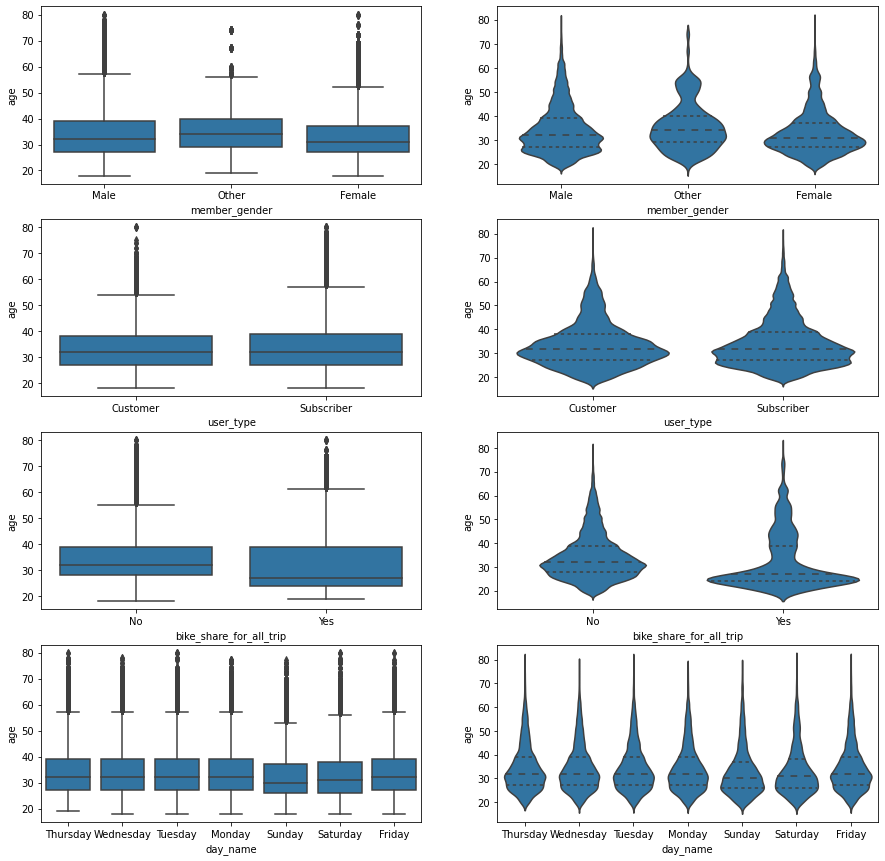

In [744]:
# plot the categorical variables against duration for all the data set
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,15])

for i in range(len(cat_vars)):
    var = cat_vars[i]
    sb.boxplot(data = bikes, x = var, y = 'age', ax = ax[i,0],
               color = default_color)
    sb.violinplot(data = bikes, x = var, y = 'age', ax = ax[i,1],
               color = default_color, inner = 'quartile')

plt.show()

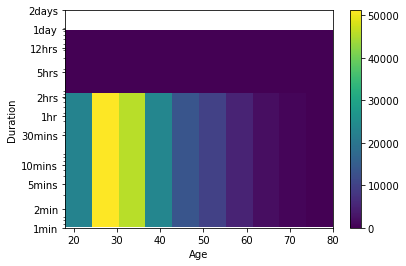

In [745]:
plt.hist2d(x= bikes.age, y = bikes.duration_sec)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration')
plt.yscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000,43200,86400,172800])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs','12hrs','1day','2days']
plt.yticks(ticks = tick, labels = label);

The heat map brings more transparency to the scatter plot above in bringing to focus the years with the most significance and the trend. The age bracket 20-30 years has the highest occurrence of duration exceeding 2hrs with a decline in occurrences as the age increases.

In [746]:
# Set a number of bins into which the data will be grouped.
#Set bin edges, and compute the center of each bin

bin_edges = np.arange(0,bikes.age.max()+5,5)
bin_centers = bin_edges[:-1] + 2

Age_binned = pd.cut(bikes.age, bin_edges, include_lowest=True)
Age_binned

0         (30.0, 35.0]
1         (45.0, 50.0]
2         (25.0, 30.0]
3         (40.0, 45.0]
4         (55.0, 60.0]
              ...     
174755    (20.0, 25.0]
174756    (30.0, 35.0]
174757    (25.0, 30.0]
174758    (30.0, 35.0]
174759    (25.0, 30.0]
Name: age, Length: 174760, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]

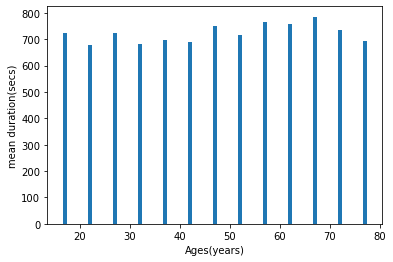

In [747]:
# For the points in each bin, we compute the mean and standard error of the mean
duration_mean = bikes.duration_sec.groupby(Age_binned).mean()
duration_std = bikes.duration_sec.groupby(Age_binned).std()

#Plot the summarized data
plt.bar(x = bin_centers, height=duration_mean)
plt.ylabel('mean duration(secs)')
plt.xlabel('Ages(years)');

Grouping the data by the means of the duration presents a different relationship all together. Middle aged users on average had a longer duration than younger people. 

Grouping the data by the categorical variables to obtain the mean of the numerical data:

In [748]:
#Define a function to achieve this
def groupby_mean(dataframe,a,b):
    grouped = dataframe.groupby([a]).mean()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a + ' vs ' + b)

### Gender vs Mean duration

               duration_sec
member_gender              
Female           779.101641
Male             672.716752
Other            997.566685


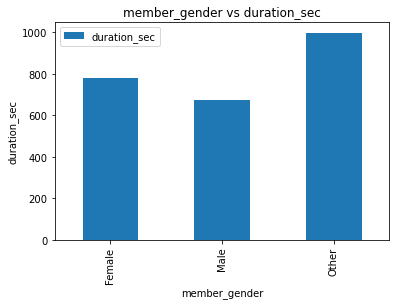

In [749]:
groupby_mean(bikes_v1,'member_gender', 'duration_sec')

Explanation: The other gender type had a higher duration than either males or females.

### User type vs Mean duration

            duration_sec
user_type               
Customer     1310.964788
Subscriber    640.819118


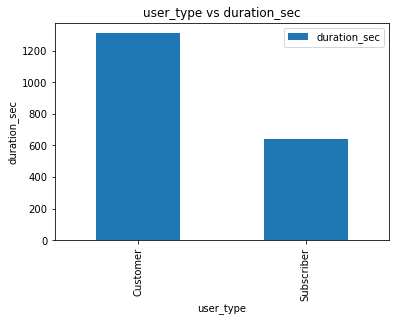

In [750]:
groupby_mean(bikes_v1, 'user_type', 'duration_sec')

### Day of the week vs mean duration

           duration_sec
day_name               
Friday       681.616777
Monday       697.765437
Saturday     849.903331
Sunday       859.453354
Thursday     678.472767
Tuesday      652.877266
Wednesday    665.228412


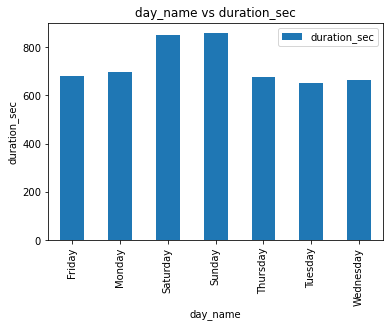

In [751]:
groupby_mean(bikes_v1, 'day_name', 'duration_sec')

### Bike sharing vs mean duration

                         duration_sec
bike_share_for_all_trip              
No                         706.444770
Yes                        684.874906


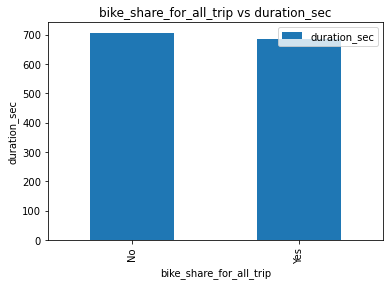

In [752]:
groupby_mean(bikes_v1, 'bike_share_for_all_trip', 'duration_sec')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration appeared to have a surprising relationship with the age feature with a log transform. There were more rides with lower age demographics. Surprisingly, the duration of the rides on average increased with age i.e older demographics used the bikes longer on average than the younger demographic. Interestingly, there were not so obvious influence on the duration based on the categorical variables with most of the data lying between the 5mins to 20mins duration. Both customers and subscribers had similar density, with the customer variable slightly gaining more duration seconds than the subscriber. Bike share during the trips showed similar pattern with a larger population of users that shared their bikes spending more time on the bikes than those that didn't. Member gender's had similar density distributions across the variables. 

> Crossing age with other categorical variables showed quite surprising relationships as well. No transform was needed at this point. Most of the data points seemed to lie between the late 20's to late 30's age variable across all categorical data types.     

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  The male gender variable dominated the member gender feature. Accounting for over 68% of customer base and over 70% of subscribers. Of all the user types, Subscribers was more dominant. More users did not share their bikes and of the ones that didn't, Subscribers was prominent. Of the subscibers, males had the highest share. A multivariate exploration would be in order to investigate more of these relationships.

## Multivariate Exploration

> The main thing I'd like to explore is how the categorical variables relate with each other

In [759]:
num_vars

['age', 'hours']

In [760]:
cat_vars

['member_gender', 'user_type', 'bike_share_for_all_trip', 'day_name']

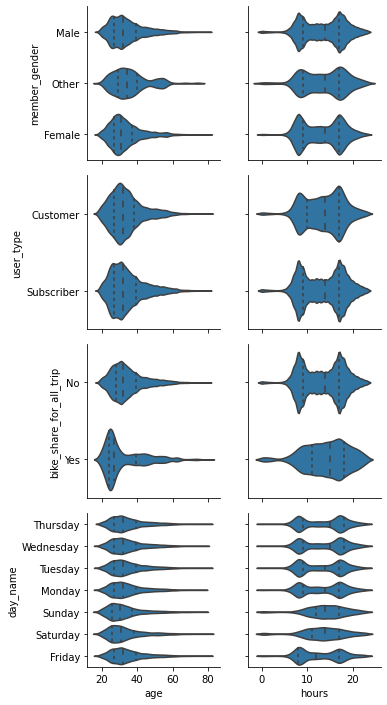

In [754]:
g = sb.PairGrid(data = bikes_v1, x_vars=num_vars, y_vars=cat_vars, )
g.map(sb.violinplot, inner = 'quartile', color = base_color);

Interesting visualizations we see from the plot matrices. We can see that the member gender for all age brackets fall between the 20 to 40 age bracket with a considerable amount of "other" under the gender types between the 40 to 60 age bracket. The time of the day as we have discussed previously is quite bimodal at the 8am and 5pm hours of the day respectively. The "Customer" user type favours the 5pm time of the day than the other 8am time of the day while the subscriber type which is more predominant, favours both as equally. It can be suggested then that non subscribers typically favour the end the day bike usage than the start of the day.
All the days of the week except weekends(Saturday and Sundays) followed a similar pattern of usage i.e favouring the 5am or 8pm time of the day usage. Whereas the weekends occurred mostly at mid-day.

Also worth mentioning is that those that did not share their bikes for the duration of the trips were slightly older than those that did. What's more fascinating is that the ones that didn't favoured strongly the 8am and 5pm time of the day usage while those that did were more or less spread out on the time of the day. 



Let's use faceting to understand the distribution of the member gender in the scatterplot of duration_sec and age

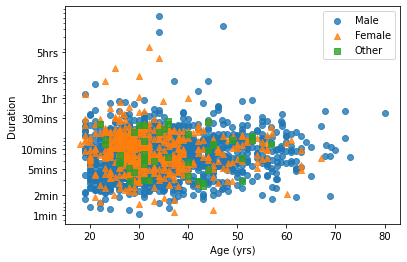

In [755]:
ttype_markers = [['Male', 'o'],
                 ['Female', '^'],
                 ['Other', 's']]
for ttype, marker in ttype_markers:
    plot_data =bikes_subset.loc[bikes['member_gender'] == ttype]
    sb.regplot(x = plot_data.age, y = plot_data.duration_sec, fit_reg = False,
               x_jitter = 0.04, marker = marker)
plt.yscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs']
plt.yticks(ticks = tick, labels = label)
plt.legend(['Male', 'Female', 'Other'])
plt.xlabel('Age (yrs)')
plt.ylabel('Duration');

We can see from the distribution that for ages less than 50, male users spend more time on the bikes than other gender types. However, it does seem that the Female users have longer bike usages above 50 than the others.

Also worth mentioning is that female users are densely populated in the mid 20's to mid 30's age bracket. As this is a subset of the data, it is suggestable that this forms a considerable amount of the female gender type.


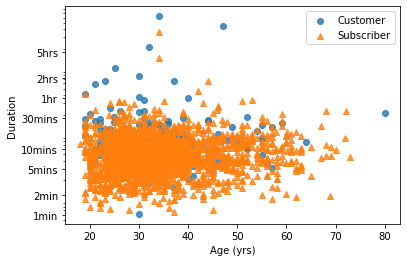

In [756]:
ttype_markers = [['Customer', 'o'],
                 ['Subscriber', '^']]
                 
for ttype, marker in ttype_markers:
    plot_data =bikes_subset.loc[bikes['user_type'] == ttype]
    sb.regplot(x = plot_data.age, y = plot_data.duration_sec, fit_reg = False,
               x_jitter = 0.04, marker = marker)
plt.yscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs']
plt.yticks(ticks = tick, labels = label)
plt.legend(['Customer','Subscriber'])
plt.xlabel('Age (yrs)')
plt.ylabel('Duration');

Again we see more of the customers that are less than the 50 yrs occupying the upper echelon of the duration variable.  As observed previously, the subscriber user type dominates the user type variable, occupying the mid 20's to early 40's age bracket. 

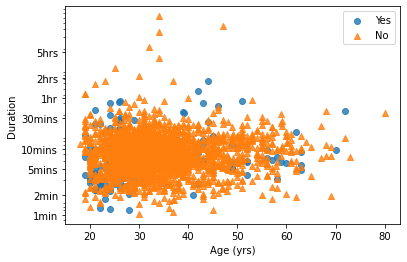

In [757]:
binsize = 2
bins = np.arange(0, bikes_subset.age.max()+binsize,binsize)
ttype_markers = [['Yes', 'o'],
                 ['No', '^'],
                ]
for ttype, marker in ttype_markers:
    plot_data =bikes_subset.loc[bikes['bike_share_for_all_trip'] == ttype]
    sb.regplot(x = plot_data.age, y = plot_data.duration_sec, fit_reg = False,
               x_jitter = 0.04, marker = marker)
plt.yscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs']
plt.yticks(ticks = tick, labels = label)
plt.legend(['Yes', 'No',])
plt.xlabel('Age (yrs)')
plt.ylabel('Duration');

From the bivarate exploration, we saw that most of the entries consisted of no bike shares during the trips. Two things worthy of note for this sample is that the bike shares that were positive are predominantly coming from the younger demographic (early 20's to early 40's age bracket).

Let us see the visualization on a heatmap

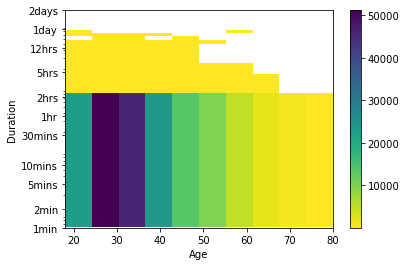

In [758]:
bins_x = np.arange(20, 70+2, 2)
plt.hist2d(data = bikes_v1, x = 'age', y = 'duration_sec',
          cmin = 2, cmap = 'viridis_r')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.yscale('log')
tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000,43200,86400,172800])
label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs','12hrs','1day','2days']
plt.yticks(ticks = tick, labels = label)
plt.colorbar();

For durations less than 2hrs, we see that the entries increases from the early 20's to peaking between the mid 20's to early 30's age bracket. Following that is a steady decline in the age occurrences by age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Interesting visualizations we see from the plot matrices. We can see that the member gender for all age brackets fall between the 20 to 40 age bracket with a considerable amount of "other" under the gender types between the 40 to 60 age bracket. The time of the day as we have discussed previously is quite bimodal at the 8am and 5pm hours of the day respectively. The "Customer" user type favours the 5pm time of the day than the other 8am time of the day while the subscriber type which is more predominant, favours both as equally. It can be suggested then that non subscribers typically favour the end the day bike usage than the start of the day.
All the days of the week except weekends(Saturday and Sundays) followed a similar pattern of usage i.e favouring the 5am or 8pm time of the day usage. Whereas the weekends occurred mostly at mid-day.

> Also worth mentioning is that those that did not share their bikes for the duration of the trips were slightly older than those that did. What's more fascinating is that the ones that didn't share their bikes favoured strongly the 8am and 5pm time of the day usage while those that did were more or less spread out on the time of the day. 

>We can see from the distribution that for ages less than 50, male users spend more time on the bikes than other gender types. However, it does seem that the Female users have longer bike usages above 50 than the others.

>Also worth mentioning is that female users are densely populated in the mid 20's to mid 30's age bracket. As this is a subset of the data, it is suggestable that this forms a considerable amount of the female gender type.

>From the bivarate exploration, we saw that most of the entries consisted of no bike shares during the trips. Two things worthy of note for this sample is that the bike shares that were positive are predominantly coming from the younger demographic (early 20's to early 40's age bracket).

 

## Conclusions
> 1. The age of the users fell predominantly between the mid 20's to early 30's age bracket.

> 2. The days of the week with the most usage was on workdays, with usage peaking at 8am and 5pm. On weekends, the usage was spreadout during the middle part of the day. 

> 3. It is suggestable that the users commutted to work as observed that thesame pattern of usage was seen by those that did not share their bikes for the duration of the trip.

> 4. The male gender type was most dominant while the subscribers formed a larger percentage of the population of user type. It was interesting to observe that the "other" gender type variable faired better than the others ("males" and "females") for age brackets greater than 50 years of age. 

> 5. Duration of bike usage was between 5mins to 30mins on most trips. That can be attributed to the distances between the stations. It is most possible that the distance from one station to another could not be beyond 30mins. As observed that most people that commuted on weekdays did so for mostly the same amount of time.

